In [1]:
from vnstock import *
from function import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


##### VN100

##### VN30

In [14]:
import requests

url = "https://www.hsx.vn/Modules/Listed/Web/StockIndex/1964531007?_search=false&nd=1676183900812&rows=2147483647&page=1&sidx=id&sord=desc"

payload={}
headers = {
  'Accept': 'application/json, text/javascript, */*; q=0.01',
  'Accept-Language': 'en-US,en;q=0.9',
  'Connection': 'keep-alive',
  'Cookie': 'ASP.NET_SessionId=pv5aylwinwlvuoxvulhw1520; TS016df111=01343ddb6ae104c44f5bd539bb677455f6c3c2c4df6c30affaabd5f271ae74106c49431df7eb64f81a41f37e5dd94c1047affa38c49a55d7f4246abf80c6c61b573c04870b; TS0d710d04027=085cef26a9ab20001b536bb274476a68a87b2efed3eb5f90c7f8ebe4891202027eb307b54dfe9d0408ba0fd881113000269cecb2cea2fc0bf24e765a0cd09051571287443d1e20737591cfee5ff928ad1f587f92d2a619403728c979f26370b4',
  'Referer': 'https://www.hsx.vn/Modules/Listed/Web/StockIndexView/1964531007',
  'Sec-Fetch-Dest': 'empty',
  'Sec-Fetch-Mode': 'cors',
  'Sec-Fetch-Site': 'same-origin',
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36 Edg/110.0.1587.41',
  'X-KL-Ajax-Request': 'Ajax_Request',
  'X-Requested-With': 'XMLHttpRequest',
  'sec-ch-ua': '"Chromium";v="110", "Not A(Brand";v="24", "Microsoft Edge";v="110"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': '"Windows"'
}

response = requests.request("GET", url, headers=headers, data=payload)
a = response.json()
ticket=[]
# VN 100
for i in range(30):
    ticket.append(a["rows"][i]["cell"][2][:3])
    
frame = []
for i in ticket:
    a = stock_historical_data(symbol=i, 
                            start_date="2013-01-01", 
                            end_date='2023-02-11')    
    a["ticker"] = i
    frame.append(a)
    
q = pd.concat(frame)
close= q.pivot_table(values="Close", columns="ticker", index="TradingDate")
high= q.pivot_table(values="High", columns="ticker", index="TradingDate")
low= q.pivot_table(values="Low", columns="ticker", index="TradingDate")
open= q.pivot_table(values="Open", columns="ticker", index="TradingDate")


### Markowitz model

In [5]:
w = marko_weights(close)
returns=close.pct_change()

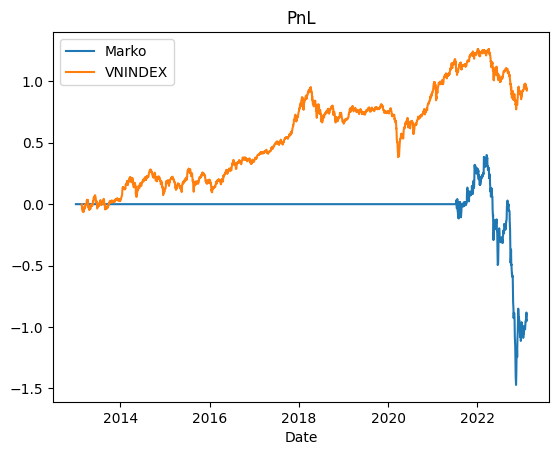

In [6]:
a = Simresult(w,returns=returns)
a.plot_pnl("Marko")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [3]:
close_t5=close-close.shift(5)

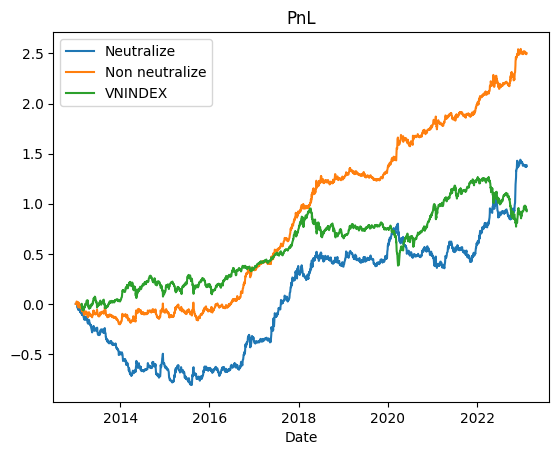

In [4]:
returns = close.pct_change()
w  = weights(close_t5, neutrali=1)
neu=Simresult(weights=w,returns=returns)
neu.plot_pnl(type="Neutralize")

w1  = weights(close_t5, neutrali=0)
non_neu=Simresult(weights=w1,returns=returns)
non_neu.plot_pnl(type="Non neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [59]:
neu.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.116131,1.026037,0.581226,0.458632,199.803249


In [60]:
neu.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.289115,-2.886706,0.628499,-1.957878,-460.008984
2014,-0.027787,-0.257894,0.603191,-0.055352,-46.065815
2015,0.025631,0.238350,0.585701,0.049861,43.760729
2016,0.372940,3.047322,0.581179,2.441085,641.695733
2017,0.467491,3.511050,0.542485,3.259341,861.758345
2018,0.032162,0.279907,0.577621,0.066049,55.680814
2019,0.094289,1.042111,0.622486,0.405582,151.471136
2020,-0.009300,-0.083557,0.577321,-0.010605,-16.109737
2021,0.139454,1.403362,0.563189,0.698326,247.614661


In [61]:
non_neu.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.250125,1.453026,0.594381,0.942582,420.81521


In [62]:
non_neu.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.201883,-1.312268,0.633236,-0.740952,-318.811946
2014,0.116070,0.680709,0.611300,0.296616,189.873894
2015,0.022471,0.146641,0.596954,0.028451,37.643256
2016,0.403735,2.814558,0.548013,2.415812,736.725821
2017,0.581298,4.198096,0.518273,4.446033,1121.606869
2018,0.329990,1.630178,0.582216,1.227280,566.783493
2019,0.124867,1.159499,0.625107,0.518224,199.753455
2020,0.420794,2.003896,0.587899,1.695347,715.758765
2021,0.210838,1.288363,0.609508,0.757745,345.914824


### alpha = rank(ts_delta(close,5))

In [39]:
close_t5=-close+close.shift(2)
alpha2 = (close_t5.rank(axis=1,ascending=True))
w =weights(alpha2)
w1 =weights(alpha2,neutrali=1)

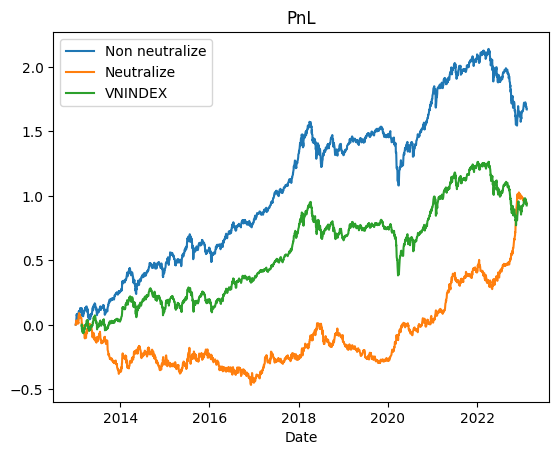

In [40]:
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(-1*w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [41]:
a.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,0.261748,1.548474,0.440990,1.192973,593.544663
2014,0.170601,0.922660,0.427531,0.582839,399.037568
2015,0.165264,0.896767,0.422112,0.561119,391.516941
2016,0.227960,1.463807,0.443337,1.049652,514.189902
2017,0.509910,4.153104,0.427359,4.536523,1193.165087
2018,0.010886,0.041993,0.420290,0.006758,25.900633
2019,0.146984,1.272542,0.429148,0.744739,342.503102
2020,0.299214,1.165582,0.434457,0.967297,688.706187
2021,0.321795,1.391124,0.432688,1.199686,743.710070


In [42]:
b.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.369160,-2.109970,1.791551,-0.957788,-206.056316
2014,0.066349,0.350688,1.770561,0.067886,37.473499
2015,0.060671,0.305987,1.750727,0.056962,34.654801
2016,-0.208818,-1.225602,1.843465,-0.412492,-113.274663
2017,0.190616,1.366576,1.796054,0.445198,106.130371
2018,0.133301,0.710848,1.749251,0.196231,76.204447
2019,-0.148109,-1.321324,1.775484,-0.381629,-83.418935
2020,0.304637,2.081770,1.797775,0.856951,169.452000
2021,0.380035,2.313388,1.788741,1.066318,212.459801


### alpha = rank(ts_stddev(close,20)/(ts_sum(close,20)/20))

In [33]:
alpha3 = close.rolling(20).std()/close.rolling(20).mean()
alpha3 = alpha3.rank(ascending=True,axis=1)

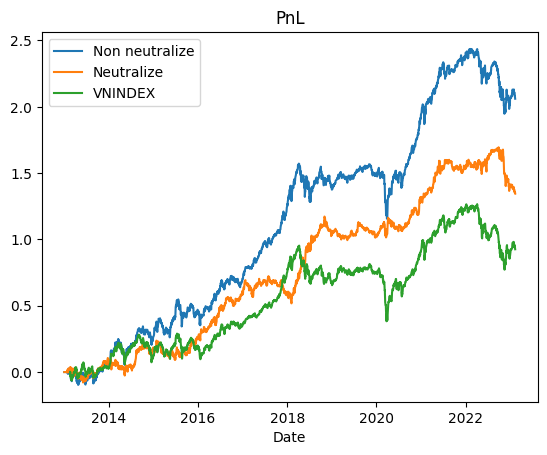

In [34]:
w =weights(alpha3, neutrali=0)
w1 =weights(alpha3,neutrali=1)

a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [37]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.205999,0.929871,0.077905,1.512068,2644.216304


In [38]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.134427,0.752887,0.321123,0.487122,418.615541


### alpha = close-ts_min(low,14))/(ts_max(high,14)-ts_min(low,14))*100

In [28]:
alpha4 = (close-low.rolling(14).min())/(high.rolling(14).max()-low.rolling(14).min())*100
alpha4 = alpha4.rank(axis=1,ascending=True)

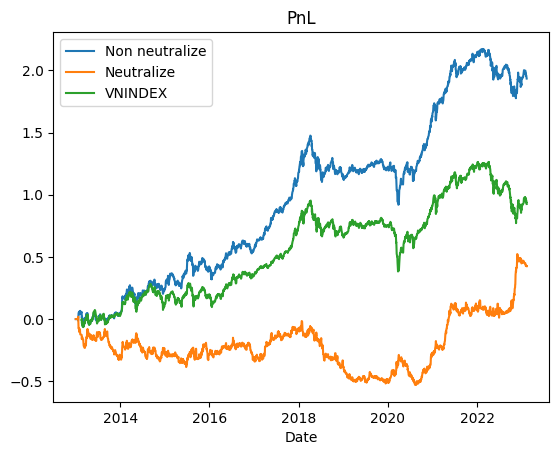

In [29]:
w =weights(alpha4, neutrali=0)
w1 =weights(alpha4,neutrali=1)

a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [31]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.19341,0.987793,0.269889,0.836206,716.629366


In [32]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.04254,0.241759,1.10978,0.047333,38.332091


### close-ts_product(close,5)^0.2

In [20]:
alpha5 = close-np.sqrt(close.rolling(2).apply(np.prod))
alpha5=alpha5.rank(axis=1,ascending=True)

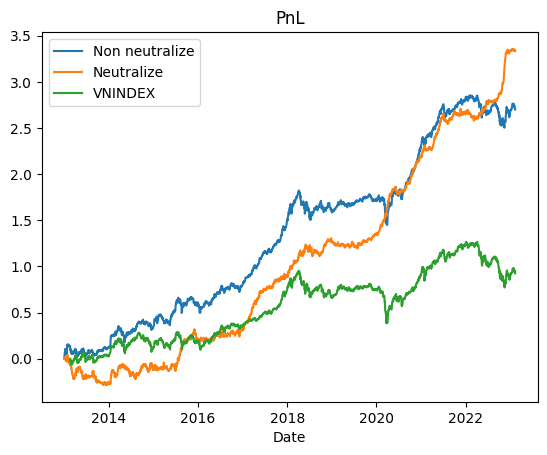

In [21]:
w =weights(alpha5, neutrali=0)
w1 =weights(alpha5,neutrali=1)

returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [19]:
w1.iloc[-1,:].sort_values(ascending=False).to_csv("weights.txt",mode="a")

In [22]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.269878,1.363704,0.60278,0.912483,447.722844


In [23]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.333485,1.946927,2.508219,0.709913,132.956756


### alpha6
a = ts_sum(open>close,20)/ts_sum(open<close,20);

b = ts_sum(open>close,250)/ts_sum(open<close,250);

rank(a/b)

In [24]:
a=(1*(open>close).rolling(20).sum())/(1*(open<close).rolling(20).sum())
b=(1*(open>close).rolling(250).sum())/(1*(open<close).rolling(250).sum())
alpha6=(a/b).rank(ascending=True,axis=1)

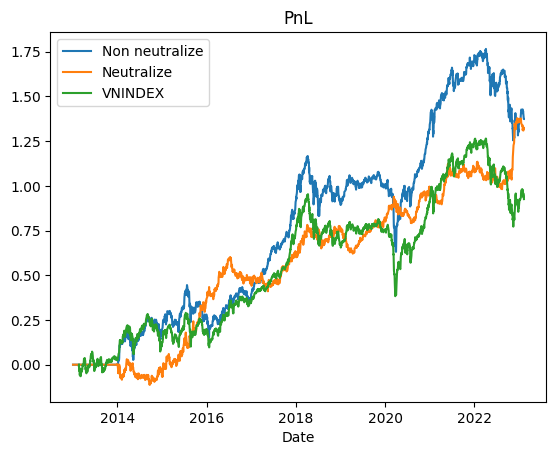

In [25]:
w =weights(alpha6, neutrali=0)
w1 =-1*weights(alpha6,neutrali=1)

returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [26]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.132059,0.910868,0.501322,0.467499,263.420573


In [27]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.137306,0.704386,0.121601,0.748492,1129.154626
